In [1]:
import numpy as np
from utils import *
import pandas as pd
from sklearn.metrics import confusion_matrix

data = pd.read_table("data/bluebird_crowd.txt", header=None)
truth = pd.read_table("data/bluebird_truth.txt", header=None)


In [2]:
import matplotlib.pyplot as plt


In [3]:
truth = truth.drop_duplicates()

In [4]:
n, m, k = np.max(np.array(data), axis=0)
print(n, m, k)


108 39 2


In [5]:
labels = transform_data(data)
labels

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
ranking = np.argsort(truth[1])

In [8]:
merged = data.merge(truth,on=0)


In [9]:
# proportion of missing values
missing = np.mean(labels == -1)
print(missing)

0.0


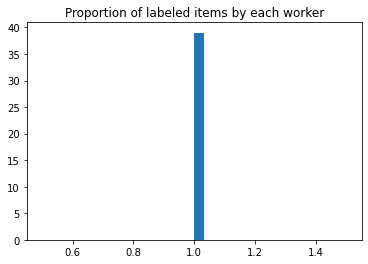

In [10]:
plt.hist(np.mean(labels != -1, axis=1), bins=30)
plt.title("Proportion of labeled items by each worker")
plt.savefig("pic/bluebird_proportion.png", dpi=300)
plt.show()

In [11]:
# total error rate
error = np.mean(merged["1_y"] != merged[2])
print(error)

0.3644349477682811


In [12]:
merged

,0,1_x,2,1_y
0,1,1,2,2
1,1,2,1,2
2,1,3,2,2
3,1,4,2,2
4,1,5,2,2
...,...,...,...,...
4207,108,35,1,1
4208,108,36,1,1
4209,108,37,1,1
4210,108,38,1,1


In [13]:
merged["error"] = merged["1_y"] != merged[2]
error_worker = merged.groupby(['1_x']).mean()

In [14]:
error_worker


,0,2,1_y,error
1_x,,,,
1,54.5,1.277778,1.444444,0.203704
2,54.5,1.425926,1.444444,0.425926
3,54.5,1.787037,1.444444,0.453704
4,54.5,1.833333,1.444444,0.555556
5,54.5,1.657407,1.444444,0.435185
6,54.5,1.898148,1.444444,0.583333
7,54.5,1.824074,1.444444,0.453704
8,54.5,1.500000,1.444444,0.148148
9,54.5,1.194444,1.444444,0.268519


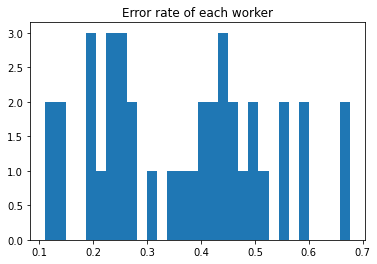

In [15]:
plt.hist(error_worker["error"], bins=30)
plt.title("Error rate of each worker")
plt.savefig("pic/bluebird_error.png", dpi=300)
plt.show()


In [16]:
error_item = merged.groupby([0]).mean()
error_item

,1_x,2,1_y,error
0,,,,
1,20.0,1.692308,2.0,0.307692
2,20.0,1.487179,2.0,0.512821
3,20.0,1.666667,2.0,0.333333
4,20.0,1.358974,2.0,0.641026
5,20.0,1.435897,2.0,0.564103
...,...,...,...,...
104,20.0,1.205128,1.0,0.205128
105,20.0,1.230769,1.0,0.230769
106,20.0,1.230769,1.0,0.230769


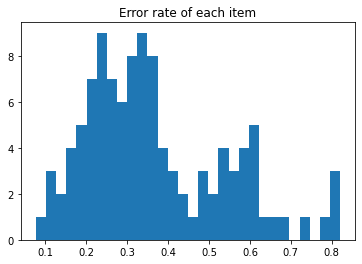

In [17]:
plt.hist(error_item["error"], bins=30)
plt.title("Error rate of each item")
plt.savefig("pic/bluebird_error_item.png", dpi=300)
plt.show()


In [18]:
confusion_matrix(merged["1_y"], merged[2])


array([[1710,  630],
       [ 905,  967]], dtype=int64)

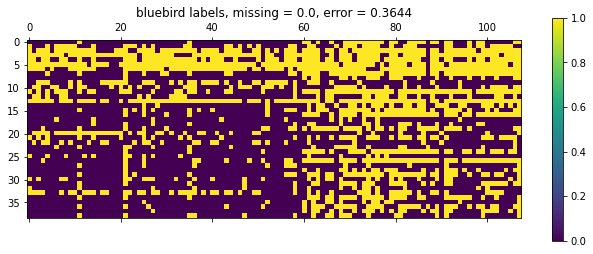

In [19]:
plt.matshow(labels[:,ranking])
plt.title("bluebird labels, missing = "+str(np.round(missing, 4)) +
          ", error = "+str(np.round(error, 4)))
plt.colorbar()
plt.savefig("pic/bluebird_labels.png", dpi=300)
plt.show()


In [24]:
def get_confusion_matrix2(k, labels, groups=None, sym=True, cutoff=1e-7, L=20, N=100, seed=None):
    m, n = labels.shape
    if seed is not None:
        np.random.seed(seed)
    if groups is None:
        groups = np.random.randint(3, size=m)
    Zg = get_Zg(k, labels, groups)
    M2s, M3s = get_M(Zg)
    Cc = np.zeros((3, k, k))
    W = np.zeros((3, k))
    for g, (M2, M3) in enumerate(zip(M2s, M3s)):
        Q = get_whiten(M2, sym)
        M3_whiten = whiten_tensor(M3, Q)
        values, vectors = robust_tensor_power(M3_whiten, L, N, sym)
        w = values**-2
        mu = np.linalg.inv(Q.T)@vectors@np.diag(values)
        best = np.argmax(mu, axis=0)

        # the method in original code
        for h in range(k):
            l = best[h]
            if W[g, l] != 0:
                l = np.where(W[g,:] == 0)[0][0]
            Cc[g,:,l] = mu[:, h].ravel()
            W[g,l] = w[h]

    W = np.mean(W, axis=0)
    C = np.zeros((m, k, k))
    for i in range(m):
        Ca = (np.sum(Cc, axis=0)-Cc[groups[i], :, :])/2
        Za = (np.sum(Zg, axis=0)-Zg[groups[i], :, :])/2
        E = np.zeros((k, k))
        for j in range(n):
            if labels[i, j] != -1:
                E[labels[i, j], :] += Za[j, :]
        E /= n
        Ci = E@np.linalg.inv(W[np.newaxis,:]*Ca.T)
        if cutoff:
            Ci[Ci < cutoff] = cutoff
        colsums = np.sum(Ci, axis=0)
        Ci /= colsums[np.newaxis, :]
        C[i, :, :] = Ci
    return C


In [33]:
C_true = get_true_confusion_matrix(data, truth)


In [34]:
C_true[0]

array([[0.96666667, 0.41666667],
       [0.03333333, 0.58333333]])

In [35]:
# baseline
confusion_matrix_loss(np.ones(C_true.shape)/k, C_true)

0.09763510505698006

In [39]:
groups = np.array([i%3 for i in range(m)])

In [40]:
confusion_matrix_loss(get_confusion_matrix(
    k, labels, groups=groups, sym=False), C_true)


0.009537344008512357

In [41]:
confusion_matrix_loss(get_confusion_matrix(
    k, labels, sym=False,seed=123), C_true)


0.009743060168580007

In [42]:
confusion_matrix_loss(get_confusion_matrix2(
    k, labels, sym=False, seed=123), C_true)


0.009743060168580007

In [45]:
# iterations
maxiter = 50
step = 5
Ls = np.array([i for i in range(step,maxiter+1,step)],dtype=int)
losses = np.zeros(len(Ls))
for i,L in enumerate(Ls):
    print(L)
    losses[i] = confusion_matrix_loss(get_confusion_matrix(
        k, labels, sym=True, L=L, N=100, seed=123), C_true)


5
10
15
20
25
30
35
40
45
50


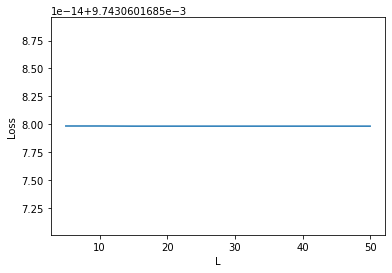

In [46]:
plt.plot(Ls,losses)
plt.xlabel("L")
plt.ylabel("Loss")
plt.savefig("pic/bluebird_L.png",dpi=300)
plt.show()


In [47]:
# iterations
maxiter = 100
step = 5
Ns = np.array([i for i in range(step, maxiter+1,step)], dtype=int)
losses_N = np.zeros(len(Ns))
for i, N in enumerate(Ns):
    print(N)
    losses_N[i] = confusion_matrix_loss(get_confusion_matrix(
        k, labels, sym=True, L=100, N=N, seed=123), C_true)


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


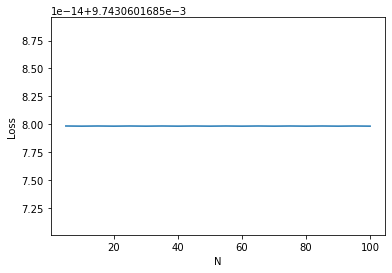

In [48]:
plt.plot(Ns, losses_N)
plt.xlabel("N")
plt.ylabel("Loss")
plt.savefig("pic/bluebird_N.png", dpi=300)
plt.show()


In [49]:
losses_N

array([0.00974306, 0.00974306, 0.00974306, 0.00974306, 0.00974306,
       0.00974306, 0.00974306, 0.00974306, 0.00974306, 0.00974306,
       0.00974306, 0.00974306, 0.00974306, 0.00974306, 0.00974306,
       0.00974306, 0.00974306, 0.00974306, 0.00974306, 0.00974306])

In [68]:
# symmetric or not
iternum = 500
sym_losses = np.zeros(iternum)
asym_losses = np.zeros(iternum)
for i in range(iternum):
    if i%10==9:
        print(i)
    sym_losses[i] = confusion_matrix_loss(get_confusion_matrix(
        k, labels, sym=True, L=20, N=20), C_true)
    asym_losses[i] = confusion_matrix_loss(get_confusion_matrix(
        k, labels, sym=False, L=20, N=20), C_true)

9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
179
189
199
209
219
229
239
249
259
269
279
289
299
309
319
329
339
349
359
369
379
389
399
409
419
429
439
449
459
469
479
489
499


In [69]:
print(np.min(sym_losses), np.max(sym_losses))
print(np.min(asym_losses), np.max(asym_losses))


0.007049704803031294 0.3088815853145724
0.007200291368966259 0.290160619137196


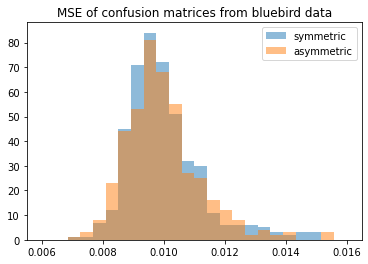

In [70]:
bins = np.linspace(0.006, 0.016, 25)
plt.hist(sym_losses,bins, alpha=0.5, label='symmetric')
plt.hist(asym_losses, bins, alpha=0.5, label='asymmetric')
plt.title("MSE of confusion matrices from bluebird data")
plt.legend(loc='upper right')
plt.savefig("pic/bluebird_symmetry.png",dpi=300)
plt.show()

From the plot we can see if we symmetricalize the matrices and tensors, the MSE of the confusion matrices can be reduced.

In [71]:
# symmetric or not
iternum = 500
new_losses = np.zeros(iternum)
original_losses = np.zeros(iternum)
for i in range(iternum):
    if i % 10 == 9:
        print(i)
    new_losses[i] = confusion_matrix_loss(get_confusion_matrix(
        k, labels, sym=True, L=20, N=20), C_true)
    original_losses[i] = confusion_matrix_loss(get_confusion_matrix2(
        k, labels, sym=True, L=20, N=20), C_true)


9
19
29
39
49
59
69
79
89
99
109
119
129
139
149
159
169
179
189
199
209
219
229
239
249
259
269
279
289
299
309
319
329
339
349
359
369
379
389
399
409
419
429
439
449
459
469
479
489
499


In [73]:
print(np.min(original_losses), np.max(original_losses))
print(np.min(new_losses), np.max(new_losses))


0.00776261538386989 0.34143372892668283
0.007271204692741211 0.29607236892903144


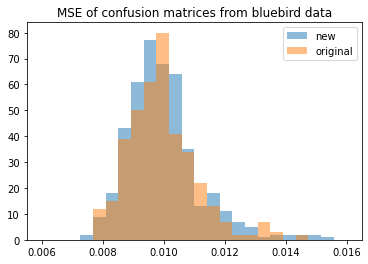

In [72]:
bins = np.linspace(0.006, 0.016, 25)
plt.hist(new_losses, bins, alpha=0.5, label='new')
plt.hist(original_losses, bins, alpha=0.5, label='original')
plt.title("MSE of confusion matrices from bluebird data")
plt.legend(loc='upper right')
plt.savefig("pic/bluebird_singular.png",dpi=300)
plt.show()
